In [1]:
import numpy as np
import cv2 as cv
from PIL import Image
from src import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img = load_img('./data/CALIB_ALEX_VEIKKA.png')
points = select_points(img)

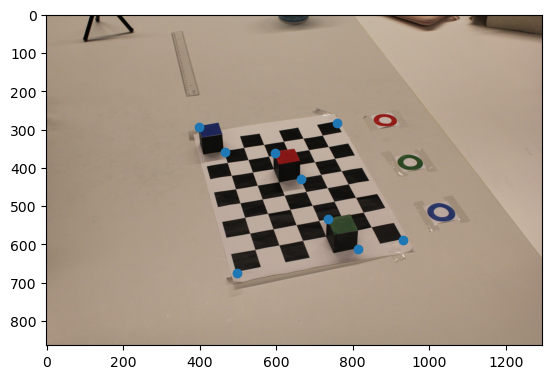

In [3]:
pts = points.copy()
pts[:, 1] = img.size[1] - pts[:, 1] - 1
plt.imshow(img)
plt.scatter(*zip(*pts))

In [4]:
points3 = pd.read_csv('./data/3d_points.csv', index_col=0)
points3 = points3.iloc[:, -3:].to_numpy()

M = calibrate_norm(points, points3)

In [5]:
K, R, C = decompose_projection(M) 

In [6]:
%matplotlib qt

In [9]:
fig = plt.figure(figsize=(10, 5))
extrinsic_params = np.hstack([R, -R@C])

ax1 = fig.add_subplot(projection='3d')
ax1.set_title("Rotation and position of the camera wrt to the cube")
ax1.grid(True)
ax1.scatter(*points3.T)
ax1.scatter(*C)
plot_frame(ax1, extrinsic_params, "E")


plt.show()

